In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy import signal
import statistics as st
df = pd.read_csv("Protcol_suit.csv")

C:\Users\User\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
df

In [ ]:
# Make 'time' start from 0
df['Time Increment'] = (df['Time Increment'] - df['Time Increment'].iloc[0])/100
df

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df['Time Increment'],df['Right Knee Flexion'])
    # Display the plot
#     plt.plot(xPoints,yPoints, 'ro', label='Highlighted Points')
plt.show()

In [ ]:
# Find peaks using scipy.signal.find_peaks
peaks_max, _ = find_peaks(df['Right Knee Flexion'], prominence=10)  # Find local maxima
peaks_min, _ =find_peaks(-df['Right Knee Flexion'], prominence=10)  # Find local minima
# Plotting
plt.figure(figsize=(20, 10))
plt.plot(df['Time Increment'], df['Right Knee Flexion'], label='Knee Angle')
plt.plot(df['Time Increment'].iloc[peaks_max], df['Right Knee Flexion'].iloc[peaks_max], 'ro', label='Local Maxima')
plt.plot(df['Time Increment'].iloc[peaks_min], df['Right Knee Flexion'].iloc[peaks_min], 'go', label='Local Minima')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Knee Angle')
plt.title('Local Maxima and Minima of Knee Angle over Time')

# Display the plot
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
# Get data between first peak minimum and last peak minimum
if len(peaks_min) >= 2:
    
    first_peak_min_index = peaks_min[1]
    last_peak_min_index = peaks_min[2]
    
# Ensure first_peak_min_index is before last_peak_min_index
if first_peak_min_index > last_peak_min_index:
    first_peak_min_index, last_peak_min_index = last_peak_min_index, first_peak_min_index

df1 = df.iloc[first_peak_min_index:last_peak_min_index + 1]

In [ ]:
# df5=df.iloc[:first_peak_min_index]

In [ ]:
# Assuming df1 is your DataFrame and it has already been loaded

# Find the peaks
peaks, _ = find_peaks(-df1['Right Knee Flexion'],prominence=5)

# df1 = df1[first_peak_index+2:]

# Plot the data
plt.figure(figsize=(20,10))
plt.plot(df1['Time Increment'], df1['Right Knee Flexion'], label='Right Knee Flexion')
plt.plot(df1['Time Increment'].iloc[peaks], df1['Right Knee Flexion'].iloc[peaks], 'ro', label='Local Maxima')
plt.xlabel('Time')
plt.ylabel('Angle')
plt.legend()
plt.show()

In [ ]:
#  df1 = df1[peaks[0]:]

In [ ]:
# Plot the data
plt.figure(figsize=(20,10))
plt.plot(df1['Time Increment'], df1['Right Knee Flexion'], label='Right Knee Flexion')
plt.xlabel('Time')
plt.ylabel('Angle')
plt.legend()
plt.show()

In [ ]:
df1.reset_index(drop=True, inplace=True)
df1

In [ ]:
# Make 'time' start from 0
df1['Time Increment'] = df1['Time Increment'] - df1['Time Increment'].iloc[0]
df1

In [4]:
df2 = pd.read_csv("Sit&Stand_imu.csv")

In [5]:
df2.columns = ['time', 'knee_angle', 'accX_T', 'accY_T', 'accZ_T', 'gyrX_T', 'gyrY_T', 'gyrZ_T', 'accX_C', 'accY_C', 'accZ_C', 'gyrX_C', 'gyrY_C', 'gyrZ_C']

In [ ]:
# Find peaks using scipy.signal.find_peaks
peaks_max, _ = find_peaks(df2['knee_angle'], prominence=3)  # Find local maxima
peaks_min, _ =find_peaks(-df2['knee_angle'], prominence=3)  # Find local minima
# Plotting
plt.figure(figsize=(10, 4))
plt.plot(df2['time'], df2['knee_angle'], label='Knee Angle')
# plt.plot(df['time'].iloc[peaks_max], df['knee_angle'].iloc[peaks_max], 'ro', label='Local Maxima')
plt.plot(df2['time'].iloc[peaks_min], df2['knee_angle'].iloc[peaks_min], 'go', label='Local Minima')

# Add labels and title
plt.xlabel('Time (sec)',fontsize=14 )
plt.ylabel('Knee Angle (degree)',fontsize=14)
# plt.title('Local Minima of Knee Angle over Time',fontsize=16, fontweight='bold')

# Display the plot
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Get data between first peak minimum and last peak minimum
if len(peaks_min) >= 2:
    
    first_peak_min_index = peaks_min[0]
    last_peak_min_index = peaks_min[5]
    
# Ensure first_peak_min_index is before last_peak_min_index
if first_peak_min_index > last_peak_min_index:
    first_peak_min_index, last_peak_min_index = last_peak_min_index, first_peak_min_index


In [ ]:

df3 = df2.iloc[first_peak_min_index:last_peak_min_index + 1]

In [ ]:
df3.reset_index(drop=True, inplace=True)
df3

In [ ]:
df3['time'] = df3['time'] - df3['time'].iloc[0]
df3

In [ ]:
df6=df2.iloc[:first_peak_min_index]
df6.reset_index(drop=True, inplace=True)
df6['time'] = df6['time'] - df6['time'].iloc[0]

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df3['time'],df3['knee_angle'])
    # Display the plot
#     plt.plot(xPoints,yPoints, 'ro', label='Highlighted Points')
plt.show()

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy import stats


# def remove_outliers_zscore(df, column):
#     z_scores = stats.zscore(df[column])
#     abs_z_scores = np.abs(z_scores)
#     filtered_entries = (abs_z_scores < 2)
#     return df[filtered_entries]

# df1_c = remove_outliers_zscore(df1,'Right Knee Flexion' )

In [ ]:


# Plot the first dataset on the first subplot
plt.plot(df1['Time Increment'],df1['Right Knee Flexion'], label='Right Knee Flexion')
plt.plot(df3['time'],df3['knee_angle'])

plt.show()

In [ ]:
# df5.reset_index(drop=True, inplace=True)
# df5

In [ ]:
peaks, _ =find_peaks(-df1['Right Knee Flexion'], prominence=5)  # Find local minima

In [23]:
import math
# Function to compute Mean Squared Error
def root_mean_squared_error(actual_values, predicted_values):
    if len(actual_values) != len(predicted_values):
        raise ValueError("Both lists must have the same length")

    mse = sum((actual - predicted) ** 2 for actual, predicted in zip(actual_values, predicted_values)) / len(actual_values)
    rmse = math.sqrt(mse)
    return rmse

In [ ]:
# df6=df2.iloc[:first_peak_min_index]

In [ ]:
# Plot the first dataset on the first subplot
plt.plot(df5['Time Increment'],df5['Right Knee Flexion'], label='Right Knee Flexion')
plt.plot(df6['time'],df6['knee_angle'])

plt.show()

In [ ]:
print(len(df3['knee_angle']))
len(df1['Right Knee Flexion'])

In [ ]:

# Create a new index for df1 based on the length of df2
new_index = np.linspace(0, len(df5)-1, len(df6)).astype(int)

# Interpolate df1 to match the size of df2
df5_downsampled = df5.iloc[new_index].interpolate(method='linear', limit_direction='forward', limit_area='inside')


In [ ]:
len(df5_downsampled)

In [ ]:
# Plot the first dataset on the first subplot
plt.plot(df6['time'],df5_downsampled['Right Knee Flexion'], label='Suit Knee Flexion')
plt.plot(df6['time'],df6['knee_angle'],label='MPU6050 Knee Flexion')

# Add labels and title
plt.xlabel('Time (sec)', fontsize=14)
plt.ylabel('Knee Angle  (degree)', fontsize=14)
plt.title('Knee angle during set to stand in TUG', fontsize=16)
plt.show()

In [ ]:
mse=root_mean_squared_error(df6['knee_angle'],df5_downsampled['Right Knee Flexion'])
mse

In [ ]:
def bland_altman_plot(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference
    plt.figure(figsize=(6, 4))

    plt.scatter(mean, diff, *args, **kwargs)
    plt.axhline(md,           color='gray', linestyle='--')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')

In [ ]:
# bland_altman_plot(imu_first_72,kineova_first_72)
bland_altman_plot(df3['knee_angle'],df1['Right Knee Flexion'][peaks[0]:846])

In [12]:
df4 = pd.read_csv("Sit_Stand_vedio.csv")
df4

,Time (ms),Angle 1
0,0,84.281868
1,33,84.294350
2,67,84.294891
3,100,84.288277
4,133,84.291176
...,...,...
535,17867,78.814720
536,17900,79.909592
537,17933,81.028984
538,17967,82.174179


In [13]:
df4.reset_index(drop=True, inplace=True)
df4['Time (ms)'] =df4['Time (ms)'] /100
df4

,Time (ms),Angle 1
0,0.00,84.281868
1,0.33,84.294350
2,0.67,84.294891
3,1.00,84.288277
4,1.33,84.291176
...,...,...
535,178.67,78.814720
536,179.00,79.909592
537,179.33,81.028984
538,179.67,82.174179


In [17]:
df4['Time (ms)'] =df4['Time (ms)'] /10
df4

,Time (ms),Angle 1
0,0.000,84.281868
1,0.033,84.294350
2,0.067,84.294891
3,0.100,84.288277
4,0.133,84.291176
...,...,...
535,17.867,78.814720
536,17.900,79.909592
537,17.933,81.028984
538,17.967,82.174179


In [18]:
df2

,time,knee_angle,accX_T,accY_T,accZ_T,gyrX_T,gyrY_T,gyrZ_T,accX_C,accY_C,accZ_C,gyrX_C,gyrY_C,gyrZ_C
0,0.00,84.62,-9.93,0.61,1.63,-0.03,-0.01,-0.02,0.63,-0.50,9.93,0.07,0.01,0.01
1,0.01,84.60,-9.91,0.65,1.61,-0.03,-0.01,-0.01,0.62,-0.46,9.91,0.07,0.01,0.01
2,0.03,84.59,-9.91,0.66,1.61,-0.03,-0.01,-0.01,0.65,-0.43,9.92,0.07,0.01,0.01
3,0.04,84.59,-9.91,0.67,1.62,-0.03,-0.01,-0.01,0.68,-0.43,9.94,0.07,0.01,0.01
4,0.05,84.60,-9.92,0.68,1.62,-0.02,-0.01,-0.01,0.69,-0.41,9.97,0.08,0.01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,19.42,84.76,-9.90,0.59,1.75,-0.04,-0.02,0.02,0.90,-0.63,9.91,0.03,0.00,0.01
1443,19.44,84.78,-9.91,0.66,1.77,-0.04,-0.02,0.02,0.91,-0.61,9.89,0.02,0.00,0.01
1444,19.45,84.80,-9.86,0.72,1.77,-0.04,-0.02,0.02,0.93,-0.60,9.88,0.02,0.00,0.00
1445,19.46,84.81,-9.85,0.72,1.77,-0.04,-0.02,0.01,0.91,-0.59,9.88,0.02,0.00,0.00


In [19]:
df2.reset_index(drop=True, inplace=True)
df2['time'] = df2['time'] - df2['time'].iloc[0]
df2

,time,knee_angle,accX_T,accY_T,accZ_T,gyrX_T,gyrY_T,gyrZ_T,accX_C,accY_C,accZ_C,gyrX_C,gyrY_C,gyrZ_C
0,0.00,84.62,-9.93,0.61,1.63,-0.03,-0.01,-0.02,0.63,-0.50,9.93,0.07,0.01,0.01
1,0.01,84.60,-9.91,0.65,1.61,-0.03,-0.01,-0.01,0.62,-0.46,9.91,0.07,0.01,0.01
2,0.03,84.59,-9.91,0.66,1.61,-0.03,-0.01,-0.01,0.65,-0.43,9.92,0.07,0.01,0.01
3,0.04,84.59,-9.91,0.67,1.62,-0.03,-0.01,-0.01,0.68,-0.43,9.94,0.07,0.01,0.01
4,0.05,84.60,-9.92,0.68,1.62,-0.02,-0.01,-0.01,0.69,-0.41,9.97,0.08,0.01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,19.42,84.76,-9.90,0.59,1.75,-0.04,-0.02,0.02,0.90,-0.63,9.91,0.03,0.00,0.01
1443,19.44,84.78,-9.91,0.66,1.77,-0.04,-0.02,0.02,0.91,-0.61,9.89,0.02,0.00,0.01
1444,19.45,84.80,-9.86,0.72,1.77,-0.04,-0.02,0.02,0.93,-0.60,9.88,0.02,0.00,0.00
1445,19.46,84.81,-9.85,0.72,1.77,-0.04,-0.02,0.01,0.91,-0.59,9.88,0.02,0.00,0.00


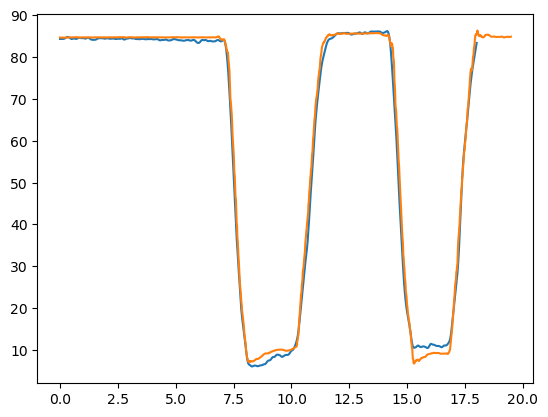

In [20]:
# Plot the first dataset on the first subplot
plt.plot(df4['Time (ms)'],df4['Angle 1'], label='Right Knee Flexion')
plt.plot(df2['time'],df2['knee_angle'])

plt.show()

In [21]:
# Create a new index for df1 based on the length of df2
new_index = np.linspace(0, len(df2)-1, len(df4)).astype(int)

# Interpolate df1 to match the size of df2
df2_downsampled = df2.iloc[new_index].interpolate(method='linear', limit_direction='forward', limit_area='inside')

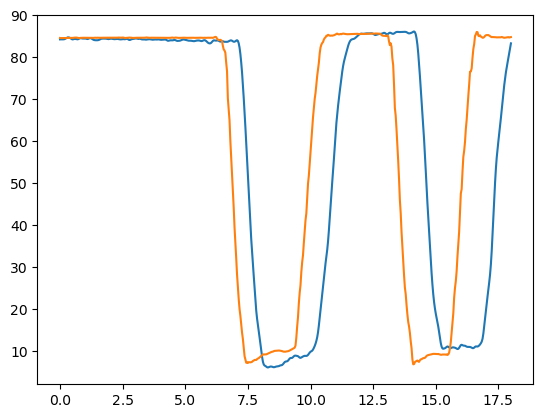

In [32]:
# Plot the first dataset on the first subplot
plt.plot(df4['Time (ms)'],df4['Angle 1'], label='Right Knee Flexion')
plt.plot(df4['Time (ms)'],df2_downsampled['knee_angle'])

plt.show()

In [25]:
mse=root_mean_squared_error(df4['Angle 1'],df2_downsampled['knee_angle'])
mse

29.881472013239893

In [28]:
df2_downsampled['knee_angle'].reset_index(drop=True, inplace=True)

In [27]:
df4['Angle 1']

0      84.281868
1      84.294350
2      84.294891
3      84.288277
4      84.291176
         ...    
535    78.814720
536    79.909592
537    81.028984
538    82.174179
539    83.336487
Name: Angle 1, Length: 540, dtype: float64

In [29]:
df2_downsampled['knee_angle']

0      84.62
1      84.59
2      84.60
3      84.62
4      84.60
       ...  
535    84.82
536    84.82
537    84.73
538    84.78
539    84.83
Name: knee_angle, Length: 540, dtype: float64

In [30]:
mse=root_mean_squared_error(df4['Angle 1'],df2_downsampled['knee_angle'])

In [31]:
mse

29.881472013239893